<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-label classification using neural networks with a regularization

#### 1. Input Data

- load the data file ('mnist.csv')
- each row of the data consists of the label $l$ and the image pixel values $x$ in a vector form
- the label is one of the 10 digits from 0 to 9, $l \in [0, 9]$
- the image represents its associated label in the grey scale
- the number of images is 10,000 and the size of each image is 28x28, $x \in \mathbb{R}^{784}$
- consider the first `1,000` images for `training` and the rest `9,000` images for `testing`
- normalise the intensity values of each image so that they ranges from 0 to 1

#### 2. Neural Network Architecture

(https://gitlab.com/byungwoohong/class-2020-1-machinelearning/-/blob/master/assignment/10/assignment-10.md)

- build a neural network for the multi-label classification with 10 labels
- construct a neural network that consists of an input layer, an output layer and a sequence of hidden layers
- each hidden layer is defined by a logistic unit
- a logistic unit consists of a fully connected layer with a bias followed by the sigmoid activation function 
- the dimensions of the input layer and the output layer are defined by:
    - input unit : 784 (+ a bias)
    - output unit : 10
- you can use determine the dimension of each hidden layer as you want

#### 2. Sigmoid function as an activation function

- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 3. Objective Function

- $J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{9}( - l^{(i)}_k \log( h^{(i)}_k ) - (1 - l^{(i)}_k) \log(1 - h^{(i)}_k) ) + \frac{\lambda}{2 n} \sum_{j=1}^n \theta_j^2$ 
- $\theta_j$ denotes a model parameter where $j = 1, 2, \cdots, n$
- $\lambda$ is a control parameter for the regularization based on the $L_2^2$-norm (weight decay)
- $n$ is the total number of all the model parameters over the entire neural network
- $h^{(i)}_k$ denotes the $k$-th element of the output layer for $i$-th sample data

#### 4. Gradient Descent (Back-propagation)

- $\theta_{k}^{(t+1)} := \theta_{k}^{(t)} - \alpha \frac{\partial J(\theta^{(t)})}{\partial \theta_{k}}$, for all $k$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use random initial conditions $\theta_k^{(0)}$ for all $k$ following a normal distribution with mean 0 and stardard deviation some number
 
#### 5. Training

- find optimal parameters $\theta$ using the training data

#### 6. Testing

- apply the obtained $\theta$ from the training process using the testing data

#### 7. Determination of class

- $l^* = \arg\max_k h_k$
- the label is determined by the index of the maximum value at the output of the network for testing

#### 8. Compute the accuracy

- the accuracy is computed by $\frac{\textrm{number of correct predictions}}{\textrm{total number of predictions}}$

#### 9. Regularization

- you can choose a value for the regularization parameter $\lambda$ in such a way that the best `testing accuracy` can be achieved



## Maching Learning Lecture
~ Lecture 10

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

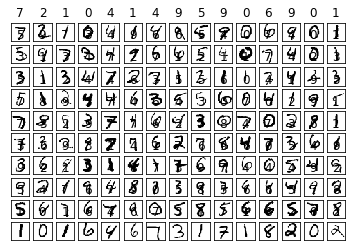

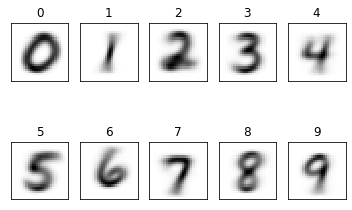

In [2]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/mnist_test.csv'
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [3]:
print(f'num_image: {num_image}')
print(f'list_image.shape: {list_image.shape}')
print(f'list_label.shape: {list_label.shape}')

num_image: 10000
list_image.shape: (784, 10000)
list_label.shape: (10000,)


In [4]:
num_train = 1000
num_test  = 9000
train_image = list_image[:, 0:num_train]
train_label = list_label[0:num_train]
print(f'train_image.shape: {train_image.shape}')
print(f'train_label.shape: {train_label.shape}')
test_image = list_image[:, num_train:]
test_label = list_label[num_train:]
print(f'test_image.shape: {test_image.shape}')
print(f'test_label.shape: {test_label.shape}')

train_image.shape: (784, 1000)
train_label.shape: (1000,)
test_image.shape: (784, 9000)
test_label.shape: (9000,)


In [5]:
num_class = 10
# train/test_label_one: integer labels into one-hot vector
train_label_one = np.eye(num_class)[train_label]
test_label_one = np.eye(num_class)[test_label]
print(f'train_label_one.shape: {train_label_one.shape}')
print(f'test_label_one.shape: {test_label_one.shape}')

train_label_one.shape: (1000, 10)
test_label_one.shape: (9000, 10)


In [0]:
def forward_prop_with_dropout(x, theta_1, theta_2, theta_3, bias_1, bias_2, bias_3, drop_rate):
  # layer 1
  a_1 = x
  # print(f'a_1.shape: {a_1.shape}')

  # layer 2
  y_ = np.matmul(theta_1.T, x) + bias_1
  # print(f'y_: {y_}')
  y = 1 / (1 + np.exp(-1 * y_))
  a_2 = y
  d_2 = np.random.rand(y.shape[0]) > drop_rate # dropout
  y *= d_2
  # print(f'a_2.shape: {a_2.shape}')

  # layer 3
  z_ = np.matmul(theta_2.T, y) + bias_2
  # print(f'z_: {z_}')
  z = 1 / (1 + np.exp(-1 * z_))
  a_3 = z
  d_3 = np.random.rand(z.shape[0]) > drop_rate # dropout
  z *= d_3
  # print(f'a_3.shape: {a_3.shape}')

  # layer 4
  h_ = np.matmul(theta_3.T, z) + bias_3
  # print(f'h_: {h_}')
  h = 1 / (1 + np.exp(-1 * h_))
  a_4 = h
  # print(f'a_4.shape: {a_4.shape}')

  return a_1, a_2, a_3, a_4, d_2, d_3

In [0]:
def forward_prop(x, theta_1, theta_2, theta_3, bias_1, bias_2, bias_3):
  # layer 1
  a_1 = x
  # print(f'a_1.shape: {a_1.shape}')

  # layer 2
  y_ = np.matmul(theta_1.T, x) + bias_1
  # print(f'y_: {y_}')
  y = 1 / (1 + np.exp(-1 * y_))
  a_2 = y
  # print(f'a_2.shape: {a_2.shape}')

  # layer 3
  z_ = np.matmul(theta_2.T, y) + bias_2
  # print(f'z_: {z_}')
  z = 1 / (1 + np.exp(-1 * z_))
  a_3 = z

  # print(f'a_3.shape: {a_3.shape}')

  # layer 4
  h_ = np.matmul(theta_3.T, z) + bias_3
  # print(f'h_: {h_}')
  h = 1 / (1 + np.exp(-1 * h_))
  a_4 = h
  # print(f'a_4.shape: {a_4.shape}')

  return a_1, a_2, a_3, a_4

In [0]:
def back_prop(m, theta_1, theta_2, theta_3,
              a_1, a_2, a_3, a_4,
              bias_1, bias_2, bias_3,
              d_2, d_3,
              learning_rate, epsilon, accuracy_count, loss, control_param):
  
  pred_label = np.argmax(a_4)
  gt_label = train_label[m]
  # print(f'gt_label: {gt_label}')
  # print(f'pred_label.shape: {pred_label}')
  gt_label_one = train_label_one[m]

  if pred_label == gt_label:
    accuracy_count += 1
  loss += loss_func(a_4, gt_label_one)
  
  delta_4 = a_4 - gt_label_one
  # print(f'delta_4.shape: {delta_4.shape}')
  delta_3 = np.dot(W, delta_4)*a_3*(1-a_3)
  # print(f'delta_3.shape: {delta_3.shape}')
  delta_2 = np.dot(V, delta_3)*a_2*(1-a_2)
  # print(f'delta_2.shape: {delta_2.shape}')

  a_2 *= d_2
  a_3 *= d_3
  
  a_4 = a_4.reshape((10, 1))
  a_3 = a_3.reshape((49, 1))
  a_2 = a_2.reshape((196, 1))
  a_1 = a_1.reshape((784, 1))

  delta_4 = delta_4.reshape((10, 1))
  delta_3 = delta_3.reshape((49, 1))
  delta_2 = delta_2.reshape((196, 1))

  grad_3 = np.dot(a_3, delta_4.T)
  # print(f'grad_3.shape: {grad_3.shape}')
  grad_2 = np.dot(a_2, delta_3.T)
  # print(f'grad_2.shape: {grad_2.shape}')
  grad_1 = np.dot(a_1, delta_2.T)
  # print(f'grad_1.shape: {grad_1.shape}')

  D_3 = grad_3 + control_param*W
  D_2 = grad_2 + control_param*V
  D_1 = grad_1 + control_param*U

  delta_4 = delta_4.reshape((10,))
  delta_3 = delta_3.reshape((49,))
  delta_2 = delta_2.reshape((196,))

  new_bias_1 = bias_1 - lr * delta_2
  new_bias_2 = bias_2 - lr * delta_3
  new_bias_3 = bias_3 - lr * delta_4

  new_W = theta_3 - lr*D_3
  new_V = theta_2 - lr*D_2
  new_U = theta_1 - lr*D_1

  return new_U, new_V, new_W, new_bias_1, new_bias_2, new_bias_3, accuracy_count, loss

In [0]:
def loss_func(pred_prob, gt_label):
  # print(f'pred_prob: {pred_prob}')
  # print(f'gt_label: {gt_label}')
  temp = -gt_label*np.log(pred_prob)-(1-gt_label)*np.log(1-pred_prob)
  # print(f'temp.shape: {temp.shape}')
  return np.mean(temp)

In [31]:
# layer1 = 784
# layer2 = 196
# layer3 = 49
# layer4 = 10

U = np.random.normal(0.0, 1.0, size=(784, 196))
V = np.random.normal(0.0, 1.0, size=(196, 49))
W = np.random.normal(0.0, 1.0, size=(49, 10))

b_1 = np.random.normal(0.0, 1.0, size=(196))
b_2 = np.random.normal(0.0, 1.0, size=(49))
b_3 = np.random.normal(0.0, 1.0, size=(10))

epochs = 200
lr = 1e-2 # learning_rate
e = 1e-4 # epsilon for stopping criteria
control_param = 1e-3

num_param = U.shape[0]*U.shape[1]+V.shape[0]*V.shape[1]+W.shape[0]*W.shape[1]
num_theta = 3

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
right_pred_list = []
wrong_pred_list = []

for itr in range(epochs):
  accr_cnt = 0
  for m in range(num_train):
    x = train_image[:, m]
    a_1, a_2, a_3, a_4, d_2, d_3 = forward_prop_with_dropout(x, U, V, W, b_1, b_2, b_3, 0.1)
    U, V, W, b_1, b_2, b_3, accr_cnt, loss = back_prop(m, U, V, W,
                                                       a_1, a_2, a_3, a_4,
                                                       b_1, b_2, b_3,
                                                       d_2, d_3,
                                                       lr, e, accr_cnt, loss,
                                                       control_param)
    # print(m, accr_cnt)
  
  # print(f'before loss: {loss}')
  loss += (np.sum(U**2)+np.sum(V**2)+np.sum(W**2))*control_param/(2*num_theta)
  # print(f'aft loss: {loss}')
  train_loss = loss/num_train
  train_loss_list.append(train_loss)
  train_accr = (accr_cnt/num_train)*100
  train_accuracy_list.append(train_accr)

  # test
  accr_cnt = 0
  loss = 0
  for m in range(num_test):
      x = test_image[:, m]
      a_1, a_2, a_3, a_4 = forward_prop(x, U, V, W, b_1, b_2, b_3)
      pred_label = np.argmax(a_4)
      gt_label = test_label[m]
      # print(f'gt_label: {gt_label}')
      # print(f'pred_label.shape: {pred_label}')
      gt_label_one = test_label_one[m]

      if pred_label == gt_label:
        accr_cnt += 1
        right_pred_list.append((m, pred_label))
      else:
        wrong_pred_list.append((m, pred_label))
      loss += loss_func(a_4, gt_label_one)
      
  # print(f'before loss: {loss}')
  loss += (np.sum(U**2)+np.sum(V**2)+np.sum(W**2))*control_param/(2*num_theta)
  # print(f'aft loss: {loss}')
  test_loss = loss/num_test
  test_loss_list.append(test_loss)
  test_accr = (accr_cnt/num_test)*100
  test_accuracy_list.append(test_accr)

  if (itr+1) % 10 == 0:
    print(f'itr: {itr+1}')
    print(f'train_loss: {train_loss}')
    print(f'train_accr: {train_accr}')
    print(f'test_loss: {test_loss}')
    print(f'test_accr: {test_accr}')

final_step = i
print(f'max_test_accuracy: {max(test_accuracy_list)}')

itr: 10
train_loss: 1.784887047366224
train_accr: 65.8
test_loss: 0.17005012390973
test_accr: 69.77777777777779
itr: 20
train_loss: 1.3323256867331843
train_accr: 81.10000000000001
test_loss: 0.1323257836856446
test_accr: 77.5
itr: 30
train_loss: 1.1215839828921208
train_accr: 86.7
test_loss: 0.11104683998024706
test_accr: 81.43333333333334
itr: 40
train_loss: 0.99754406549374
train_accr: 92.30000000000001
test_loss: 0.09987892106478197
test_accr: 83.35555555555555
itr: 50
train_loss: 0.9065788466718216
train_accr: 93.2
test_loss: 0.09364545488929504
test_accr: 84.65555555555555
itr: 60
train_loss: 0.8535920971304111
train_accr: 95.7
test_loss: 0.08749459524297437
test_accr: 85.74444444444444
itr: 70
train_loss: 0.7981595805421354
train_accr: 96.89999999999999
test_loss: 0.08326922251401313
test_accr: 86.4888888888889
itr: 80
train_loss: 0.772094630652942
train_accr: 97.0
test_loss: 0.08119201821978181
test_accr: 86.91111111111111
itr: 90
train_loss: 0.7446096133255146
train_accr: 98.1

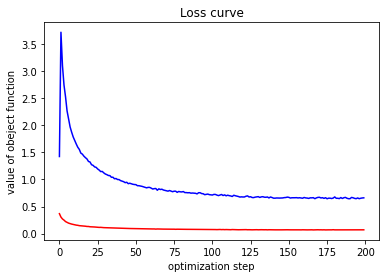

In [32]:
plt.plot(range(epochs), train_loss_list, c='b')
plt.plot(range(epochs), test_loss_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Loss curve')
plt.show()

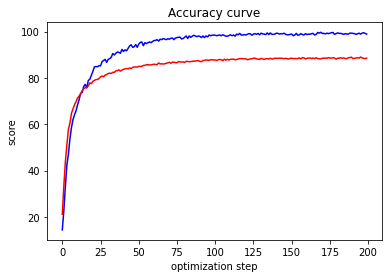

In [33]:
plt.plot(range(epochs), train_accuracy_list, c='b')
plt.plot(range(epochs), test_accuracy_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('score')
plt.title('Accuracy curve')
plt.show()

In [34]:
# print the accuracy value
print(f'Final training accuracy(%): {train_accuracy_list[-1]}')
print(f'Final testing accuracy(%): {test_accuracy_list[-1]}')

Final training accuracy(%): 98.9
Final testing accuracy(%): 88.52222222222223


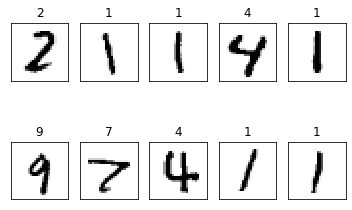

In [37]:
for i in range(10):
    idx = right_pred_list[i][0]
    pred_label  = right_pred_list[i][1]
    im_vector   = test_image[:, idx]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(pred_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

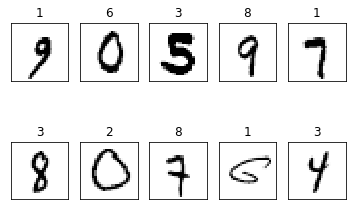

In [38]:
for i in range(10):
    idx = wrong_pred_list[i][0]
    pred_label  = wrong_pred_list[i][1]
    im_vector   = test_image[:, idx]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(pred_label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()